In [176]:
import colorgram
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dir = os.getcwd()

In [177]:
print(dir)

/Users/jing/Documents/ipynb


In [179]:
img_dir = os.path.join(dir,r'Pillow_img')
img_url = pd.read_csv("./image_url_061119update6th.csv",index_col = 2)
palette = pd.read_csv(os.path.join(dir,r'page1-99_RGB_unique.csv'), index_col = 0)
print (palette.shape)

(3179, 4)


In [180]:
# found that one row had blannk RGB4 due to website errors: should be #f7f7f8 but had 7f7f8
# this caused a NaN during Hex-RGB conversion which was automatically done during scraping
# remove

# count number of palettes with NaN for each RGB
print (palette_unique.isnull().sum())

findNAN = palette_unique.isnull().apply(sum, axis = 1)

palette_to_drop = findNAN[findNAN >0].index.values

print(palette_to_drop)

RGB1    1
RGB2    0
RGB3    1
RGB4    2
dtype: int64
['Bright Tart Cherries' 'Desk Decors' 'Biker Girl' 'Balancing Pineapple']


In [181]:
# remove the 4 palettes with incomplete RGB values
palette = palette.drop (palette_to_drop, axis = 0)

# confirm again there is no NaN 
print (print (palette.isnull().sum()))

In [191]:
# first, experiment with the first row to convert string to a tuple
palette_rgb = palette.loc['Up Shore','RGB1'] 
print (palette_rgb + str(type(palette_rgb)))
palette_rgb_tuple = tuple(map(int, palette_rgb[4:len(palette_rgb)-1].replace(' ','').split(',')))
print (palette_rgb_tuple)
print (palette_rgb_tuple[0])

rgb(2, 146, 183)<class 'str'>
(2, 146, 183)
2


In [192]:
# reformat palette RGB values into integer tuple
# function tupleNumb converts all palette RGB strings to numeric tuples 
def tupleNum(str):
    output= tuple(map(int, str[4:len(str)-1].replace(' ','').split(',')))
    return output

In [190]:
# store all 3175 indexes
palette_index = palette.index.values

# apply tupleNum function to each row
palette_tuple = palette.applymap(tupleNum)
print(palette_tuple.tail())
print(palette_tuple.shape)

                               RGB1             RGB2             RGB3  \
Meat and Veggies      (157, 63, 34)  (255, 240, 223)    (22, 101, 24)   
Growing Toadstools    (188, 63, 31)  (255, 240, 223)      (0, 40, 66)   
Hat Decorating       (138, 70, 179)     (88, 93, 38)  (165, 174, 244)   
Latte Preparation   (245, 206, 188)  (232, 161, 101)  (250, 235, 217)   
Fox Eyes            (166, 137, 123)   (171, 111, 85)  (220, 206, 190)   

                               RGB4  
Meat and Veggies      (56, 72, 111)  
Growing Toadstools     (53, 77, 45)  
Hat Decorating      (202, 194, 183)  
Latte Preparation      (33, 36, 32)  
Fox Eyes               (33, 30, 34)  
(3175, 4)


In [249]:
export_csv = palette_tuple.to_csv (os.path.join(dir,r'palette_clean.csv'), index = True, header=True)

In [231]:
# now move on to extrating pillow RGB
# first, experiment with one image
img_name = img_url.index.values[290]+'.jpg'
# extract 3 most dominant colors, ranked by proportion of the image
colors = colorgram.extract(os.path.join(img_dir,img_name),3)
print (img_name + ':')
print (colors)

Page_5_51.jpg:
[<colorgram.py Color: Rgb(r=56, g=0, b=1), 100.0%>]


In [234]:
# rgb has is a colorgram.colorgram.Rgb object
rgb = colors[0].rgb
print ("RGB of the most predominant color is: " + str(rgb))
print (" where red has a value of " + str(rgb[0]))
colors[0].proportion==1

RGB of the most predominant color is: Rgb(r=56, g=0, b=1)
 where red has a value of 56


True

In [208]:
path, dirs, files = next(os.walk(os.path.join(dir, img_dir)))
print ("There are " + str(len(files)) + " images.")

There are 1879 images.


In [241]:
# move on to run colorgram on all images under the path img_dir
# initiate two empty lists
RGB_x = []
Proportion_x = []
RGB_y = []
Proportion_y = []

for i in range (len(img_url.index)):
    img_name = img_url.index.values[i]+'.jpg'
    colors = colorgram.extract(os.path.join(img_dir,img_name),2)
    RGB_x.append(colors[0].rgb)
    Proportion_x.append(colors[0].proportion)
    if colors[0].proportion==1:
        RGB_y.append(colors[0].rgb)
        Proportion_y.append(0)
    else:
        RGB_y.append(colors[1].rgb)
        Proportion_y.append(colors[1].proportion)
    

In [242]:
img_url['RGB_x'] = RGB_x
img_url['Proportion_x'] = Proportion_x
img_url['RGB_y'] = RGB_y
img_url['Proportion_y'] = Proportion_y

print(img_url.head())
export_csv = img_url.to_csv (os.path.join(dir,r'tagged_image_url.csv'), index = True, header=True)

          Unnamed: 0                                                url  \
index                                                                     
Page_1_1           0  https://ak1.ostkcdn.com/images/products/941290...   
Page_1_2           1  https://ak1.ostkcdn.com/images/products/132185...   
Page_1_3           2  https://ak1.ostkcdn.com/images/products/881687...   
Page_1_4           3  https://ak1.ostkcdn.com/images/products/662457...   
Page_1_5           4  https://ak1.ostkcdn.com/images/products/881715...   

                    RGB_x  Proportion_x            RGB_y  Proportion_y  
index                                                                   
Page_1_1  (247, 245, 243)      0.641295  (183, 153, 126)      0.358705  
Page_1_2  (244, 241, 238)      0.721963  (185, 164, 148)      0.278037  
Page_1_3  (254, 254, 252)      0.830225     (41, 48, 66)      0.169775  
Page_1_4  (169, 159, 146)      0.645881     (14, 37, 54)      0.354119  
Page_1_5  (213, 211, 210)      0.578

In [122]:
# credit to: https://web.archive.org/web/20100316195057/http://www.dfanning.com/ip_tips/color2gray.html
# credit to: https://stackoverflow.com/questions/1847092/given-an-rgb-value-what-would-be-the-best-way-to-find-the-closest-match-in-the-d
# d = sqrt(((r2-r1)*0.3)^2 + ((g2-g1)*0.59)^2 + ((b2-b1)*0.11)^2)
# Rose_gray = 0.3*Reform(rose[0,*,*]) + 0.59*Reform(rose[1,*,*]) + 0.11*Reform(rose[2,*,*])
# difference in colors is calculated by spatial distance in the 3-D color dimension
# Method 1: Euclidean distance with weights [0.3,0.59,0.11]
# Method 2 (try later): Euclidean distance without weights

In [250]:
from scipy.spatial import distance as distance
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

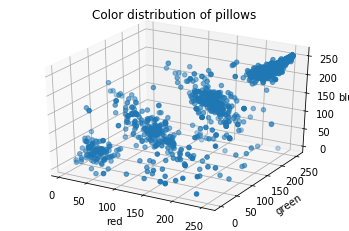

<Figure size 432x288 with 0 Axes>

In [272]:
# first draw a 3D plot to see the distribution of products
# use this to return the 1st item in tuples in a list [i[0] for i in img_url['RGB_x']]
pillow_r =[i[0] for i in img_url['RGB_x']]
pillow_g =[i[1] for i in img_url['RGB_x']]
pillow_b =[i[2] for i in img_url['RGB_x']]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(pillow_r,pillow_g,pillow_b)

ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue') 

ax.set_title('Color distribution of pillows')

plt.show()
plt.clf()

In [256]:
# Method 1: Euclidean distance with weights [0.3,0.59,0.11]
# First, find the most similar color to user's choice from all colors in palette database
# if multiple palette colors are pulled return the one with smallest index number
# since palettes are ranked by popularity


pandas.core.series.Series

In [266]:
img_url.shape[0]

1879